**The content contained in this notebook is from a post in Real Python by Pedro Pregueiro.  
you can access it from this website:  
https://realpython.com/linked-lists-python/**
  
  
  
# Understanding Linked Lists
<font size=4>Linked lists are an ordered collection of objects. They differ from lists in the way that they store elements in memory. While lists use a contiguous memory block to store references to their data, linked lists store references as part of their own elements.</font>

## Main Concepts
<font size=4>First, let's see how they are structured. Each element of a linked list is called a node, and every node has two different fields:

**Data:** contains the value to be stored in the node.  
    
**Next:** contains a reference to the next node on the list.  
      
    
Here’s what a typical node looks like:  </font>
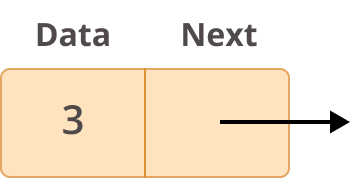  
  
  
 

<font size=4>A linked list is a collection of nodes. The first node is called the **`head`**, and it’s used as the starting point for any iteration through the list. The last node must have its `next` reference pointing to **`None`** to determine the end of the list. Here’s how it looks:</font>

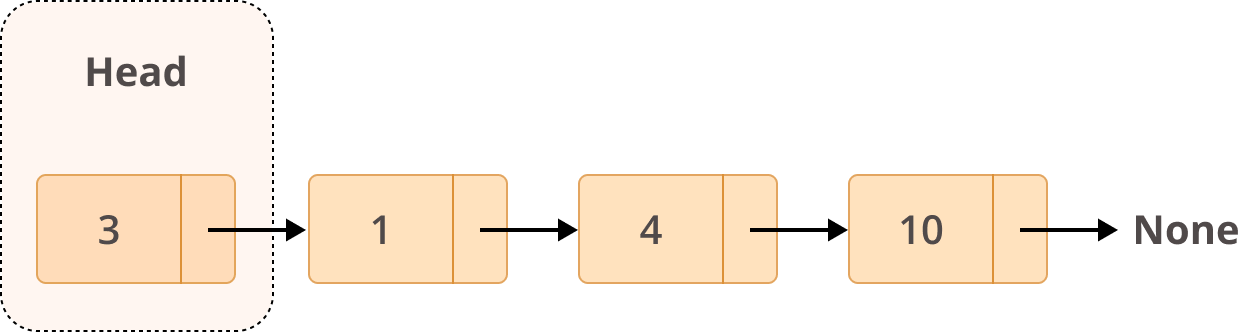 



## Practical Applications
<font size=4>Linked lists serve a variety of purposes in the real world. They can be used to implement queues or stacks as well as graphs. They’re also useful for much more complex tasks, such as lifecycle management for an operating system application.</font>

### Queues or Stacks
<font size=4>Queues and stacks differ only in the way elements are retrieved.   
    For a queue, you use a First-In/First-Out (FIFO) approach. That means that the first element inserted in the list is the first one to be retrieved:</font>
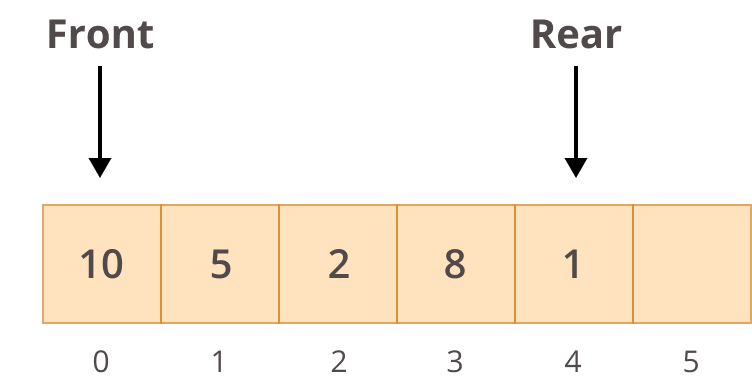  
  
  
<font size=4>In the diagram above, you can see the front and rear elements of the queue. When you append new elements to the queue, they’ll go to the rear end. When you retrieve elements, they’ll be taken from the front of the queue.</font>

<font size=4>For a stack, you use a Last-In/Fist-Out (LIFO) approach, meaning that the last element inserted in the list is the first to be retrieved:

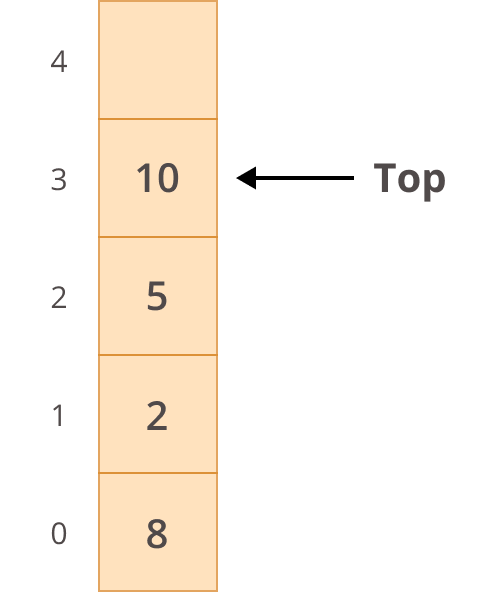  
    
In the above diagram you can see that the first element inserted on the stack (index 0) is at the bottom, and the last element inserted is at the top. Since stacks use the LIFO approach, the last element inserted (at the top) will be the first to be retrieved.

Because of the way you insert and retrieve elements from the edges of queues and stacks, linked lists are one of the most convenient ways to implement these data structures.</font>

### Graphs
<font size=4>Graphs can be used to show relationships between objects or to represent different types of networks. For example, a visual representation of a graph—say a directed acyclic graph (DAG)—might look like this:

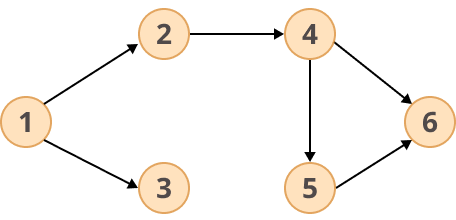

There are different ways to implement graphs like the above, but one of the most common is to use an adjacency list. An adjacency list is, in essence, a list of linked lists where each vertex of the graph is stored alongside a collection of connected vertices:  

| Vertex | Linked List of Vertices |
| --- | --- |
| 1 | 2 → 3 → None |
| 2	| 4 → None |
| 3	| None |
| 4	| 5 → 6 → None |
| 5	| 6 → None |
| 6	| None |  
  
  
In the table above, each vertex of your graph is listed in the left column. The right column contains a series of linked lists storing the other vertices connected with the corresponding vertex in the left column. This adjacency list could also be represented in code using a `dict`:</font>

In [4]:
graph = {
         1: [2, 3, None],
         2: [4, None],
         3: [None],
         4: [5, 6, None],
         5: [6, None],
         6: [None]
        }


{1: [2, 3, None],
 2: [4, None],
 3: [None],
 4: [5, 6, None],
 5: [6, None],
 6: [None]}

The keys of this dictionary are the source vertices, and the value for each key is a list. This list is usually implemented as a linked list.  
  
  
Note: In the above example you could avoid storing the `None` values, but we’ve retained them here for clarity and consistency with later examples.  
  
  
In terms of both speed and memory, implementing graphs using adjacency lists is very efficient in comparison with, for example, an adjacency matrix. That’s why linked lists are so useful for graph implementation.

## Performance Comparison: Lists vs Linked Lists
<font size=4>In most programming languages, there are clear differences in the way linked lists and arrays are stored in memory. In Python, however, lists are **dynamic arrays**. That means that the memory usage of both lists and linked lists is very similar.</font>

### Insertion and Deletion of Elements
List insertion times vary depending on the need to resize the existing array. If you read the article above on how lists are implemented, then you’ll notice that Python overallocates space for arrays based on their growth. This means that inserting a new element into a list can take anywhere from `Θ(n)` to `Θ(1)` depending on whether the existing array needs to be resized.

The same applies for deleting elements from the array. If the size of the array is less than half the allocated size, then Python will shrink the array. So, all in all, inserting or deleting elements from an array has an average time complexity of `Θ(n)`.

Linked lists, however, are much better when it comes to insertion and deletion of elements at the beginning or the end of the list, where their time complexity is constant: `Θ(1)`. This performance advantage is the reason linked lists are so useful for queues and stacks, where elements are continuously inserted and removed from the edges.

### Retrieval of Elements
When it comes to element lookup, lists perform much better than linked lists. When you know which element you want to access, lists can perform this operation in `Θ(1)` time. Trying to do the same with a linked list would take `Θ(n)` because you need to traverse the whole list to find the element.

When searching for a specific element, however, both lists and linked lists perform very similarly, with a time complexity of `Θ(n)`. In both cases, you need to iterate through the entire list to find the element you’re looking for.

# Introducing `collections.deque`
<font size=4>In Python, there’s a specific object in the `collections` module that you can use for linked lists called `deque`(pronounced “deck”), which stands for double-ended queue.

`collections.deque` uses an implementation of a linked list in which you can access, insert, or remove elements from the beginning or end of a list with constant O(1) performance.</font>

## How to Use `collections.deque`
<font size=4>There are quite a few methods that come, by default, with a `deque` object. However, in this article you’ll only touch on a few of them, mostly for adding or removing elements.

First, you need to create a linked list. You can use the following piece of code to do that with `deque`:</font>



In [6]:
from collections import deque

deque()


deque([])

The code above will create an empty linked list. If you want to populate it at creation, then you can give it an **iterable** as input:

In [10]:
print(deque(['a','b','c']))

print(deque('abc'))

print(deque([{'data': 'a'}, {'data': 'b'}]))

# I use print here to show all the three outputs.

deque(['a', 'b', 'c'])
deque(['a', 'b', 'c'])
deque([{'data': 'a'}, {'data': 'b'}])


When initializing a `deque` object, you can pass any **iterable** as an input, such as a string (also an iterable) or a list of objects.  
  
  
Now that you know how to create a `deque` object, you can interact with it by adding or removing elements. You can create an `abcde` linked list and add a new element `f` like this:

In [11]:
llist = deque("abcde")
print(llist)

llist.append("f")
print(llist)

print(llist.pop())
'f'

print(llist)

deque(['a', 'b', 'c', 'd', 'e'])
deque(['a', 'b', 'c', 'd', 'e', 'f'])
f
deque(['a', 'b', 'c', 'd', 'e'])


Both `append()` and `pop()` add or remove elements from the **right side** of the linked list. However, you can also use `deque` to quickly add or remove elements from the **left side, or head**, of the list:

In [14]:
llist.appendleft("z")
print(llist)

print(llist.popleft())

print(llist)

deque(['z', 'z', 'a', 'b', 'c', 'd', 'e'])
z
deque(['z', 'a', 'b', 'c', 'd', 'e'])


Adding or removing elements from both ends of the list is pretty straightforward using the `deque` object. Now you’re ready to learn how to use `collections.deque` to implement a queue or a stack.

## How to Implement Queues and Stacks
<font size=4>As you learned above, the main difference between a queue and a stack is the way you retrieve elements from each. Next, you’ll find out how to use `collections.deque` to implement both data structures.</font>

### Queues
<font size=4>With **queues**, you want to **add values to a list** (`enqueue`), and when the timing is right, you want to **remove the element that has been on the list the longest** (`dequeue`). For example, imagine a queue at a trendy and fully booked restaurant. If you were trying to implement a fair system for seating guests, then you’d start by creating a queue and adding people as they arrive:</font>

In [15]:
from collections import deque

queue = deque()
print(queue)

queue.append("Mary")
queue.append("John")
queue.append("Susan")
print(queue)


deque([])
deque(['Mary', 'John', 'Susan'])


Now you have Mary, John, and Susan in the queue. Remember that since queues are FIFO, the first person who got into the queue should be the first to get out.

Now imagine some time goes by and a few tables become available. At this stage, you want to remove people from the queue in the correct order. This is how you would do that:

In [16]:
print(queue.popleft())

print(queue)

print(queue.popleft())

print(queue)


Mary
deque(['John', 'Susan'])
John
deque(['Susan'])


Every time you call `popleft()`, you remove the head element from the linked list, mimicking a real-life queue.

### Stacks
<font size=4>What if you wanted to create a stack instead? Well, the idea is more or less the same as with the queue. The only difference is that the stack uses the LIFO approach, meaning that the last element to be inserted in the stack should be the first to be removed.

Imagine you’re creating a web browser’s history functionality in which store every page a user visits so they can go back in time easily. Assume these are the actions a random user takes on their browser:</font>

- Visits Real Python’s website
- Navigates to Pandas: How to Read and Write Files
- Clicks on a link for Reading and Writing CSV Files in Python  
  
  
If you’d like to map this behavior into a stack, then you could do something like this:

In [17]:
from collections import deque

history = deque()

history.appendleft("https://realpython.com/")
history.appendleft("https://realpython.com/pandas-read-write-files/")
history.appendleft("https://realpython.com/python-csv/")

print(history)


deque(['https://realpython.com/python-csv/', 'https://realpython.com/pandas-read-write-files/', 'https://realpython.com/'])


In this example, you created an empty history object, and every time the user visited a new site, you added it to your history variable using `appendleft()`. Doing so **ensured that each new element was added to the head of the linked list**.

Now suppose that after the user read both articles, they wanted to go back to the Real Python home page to pick a new article to read. Knowing that you have a stack and want to remove elements using LIFO, you could do the following:

In [18]:
print(history.popleft())

print(history.popleft())

print(history)


https://realpython.com/python-csv/
https://realpython.com/pandas-read-write-files/
deque(['https://realpython.com/'])


There you go! Using `popleft()`, you removed elements from the head of the linked list until you reached the Real Python home page.

From the examples above, you can see how useful it can be to have `collections.deque` in your toolbox, so make sure to use it the next time you have a queue- or stack-based challenge to solve.

# Implementing Your Own Linked List
<font size=4>Now that you know how to use `collections.deque` for handling linked lists, you might be wondering why you would ever implement your own linked list in Python. There are a few reasons to do it:

- Practicing your Python algorithm skills  
    
- Learning about data structure theory  
    
- Preparing for job interviews  
    
    
Feel free to skip this next section if you’re not interested in any of the above, or if you already aced implementing your own linked list in Python. Otherwise, it’s time to implement some linked lists!</font>

## How to Create a Linked List
<font size=4>First things first, create a class to represent your linked list:</font>

In [19]:
class LinkedList:
    def __init__(self):
        self.head = None
        

The only information you need to store for a linked list is **where the list starts (the head of the list)**. Next, create another class to represent each node of the linked list:

In [20]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        

In the above class definition, you can see the two main elements of every single node: `data` and `next`. You can also add a `__repr__` to both classes to have a more helpful representation of the objects:

In [39]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        
    def __repr__(self):
        return self.data   

class LinkedList:
    def __init__(self):
        self.head = None

    def __repr__(self):
        node = self.head
        nodes = []
        while node is not None:
            nodes.append(node.data)
            node = node.next
        nodes.append("None")
        return " -> ".join(nodes)
        

Have a look at an example of using the above classes to quickly create a linked list with three nodes:

In [40]:
llist = LinkedList()
print(llist)

first_node = Node("a")
llist.head = first_node
print(llist)

second_node = Node("b")
third_node = Node("c")
first_node.next = second_node
second_node.next = third_node
print(llist)


None
a -> None
a -> b -> c -> None


By defining a node’s `data` and `next` values, you can create a linked list quite quickly. These `LinkedList` and `Node` classes are the starting points for our implementation. From now on, it’s all about increasing their functionality.

Here’s a slight change to the `LinkedList`’s `__init__()` that allows you to quickly create linked lists with some data:

In [41]:
def __init__(self, nodes=None):
    self.head = None
    if nodes is not None:
        node = Node(data=nodes.pop(0))
        self.head = node
        for elem in nodes:
            node.next = Node(data=elem)
            node = node.next
            

With the above modification, creating linked lists to use in the examples below will be much faster.

## How to Traverse a Linked List
<font size=4>One of the most common things you will do with a linked list is to traverse it. Traversing means going through every single node, starting with the head of the linked list and ending on the node that has a next value of None.

Traversing is just a fancier way to say iterating. So, with that in mind, create an `__iter__` to add the same behavior to linked lists that you would expect from a normal list:</font>

In [42]:
def __iter__(self):
    node = self.head
    while node is not None:
        yield node
        node = node.next

The method above goes through the list and yields every single node. The most important thing to remember about this `__iter__` is that you need to always validate that the current node is not None. When that condition is `False`, it means you’ve reached the end of your linked list.

After yielding the current node, you want to move to the next node on the list. That’s why you add `node = node.next`. Here’s an example of traversing a random list and printing each node:

In [52]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        
    def __repr__(self):
        return self.data   
    
class LinkedList:
    def __init__(self, nodes=None):
        self.head = None
        if nodes is not None:
            node = Node(nodes.pop(0))
            self.head = node
            for elem in nodes:
                node.next = Node(elem)
                node = node.next

    def __repr__(self):
        node = self.head
        nodes = []
        while node is not None:
            nodes.append(node.data)
            node = node.next
        nodes.append("None")
        return " -> ".join(nodes)
    
    def __iter__(self):
        node = self.head
        while node is not None:
            yield node
            node = node.next
        
        
llist = LinkedList(["a", "b", "c", "d", "e"])
print(llist)

for node in llist:
    print(node)

a -> b -> c -> d -> e -> None
a
b
c
d
e


With the above modification, creating linked lists to use in the examples below will be much faster.

In other articles, you might see the traversing defined into a specific method called `traverse()`. However, using Python’s built-in methods to achieve said behavior makes this linked list implementation a bit more Pythonic.

## How to Insert a New Node
<font size=4>There are different ways to insert new nodes into a linked list, each with its own implementation and level of complexity. That’s why you’ll see them split into specific methods for inserting at the beginning, end, or between nodes of a list.</font>

### Inserting at the Beginning
<font size=4>Inserting a new node at the beginning of a list is probably the most straightforward insertion since you don’t have to traverse the whole list to do it. It’s all about creating a new node and then pointing the head of the list to it.

Have a look at the following implementation of `add_first()` for the class `LinkedList`:</font>

In [53]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        
    def __repr__(self):
        return self.data   
    
class LinkedList:
    def __init__(self, nodes=None):
        self.head = None
        if nodes is not None:
            node = Node(nodes.pop(0))
            self.head = node
            for elem in nodes:
                node.next = Node(elem)
                node = node.next

    def __repr__(self):
        node = self.head
        nodes = []
        while node is not None:
            nodes.append(node.data)
            node = node.next
        nodes.append("None")
        return " -> ".join(nodes)
    
    def __iter__(self):
        node = self.head
        while node is not None:
            yield node
            node = node.next
            
    def add_first(self, node):
        node.next = self.head
        self.head = node

In the above example, you’re setting `self.head` as the `next` reference of the new node so that the new node points to the old `self.head`. After that, you need to state that the new head of the list is the inserted node.

Here’s how it behaves with a sample list:

In [56]:
llist = LinkedList()
print(llist)


llist.add_first(Node("b"))
print(llist)


llist.add_first(Node("a"))
print(llist)

None
b -> None
a -> b -> None


As you can see, `add_first()` always adds the node to the head of the list, even if the list was empty before.

### Inserting at the End
<font size=4>Inserting a **new node at the end** of the list **forces you to traverse the whole linked list first** and to add the new node when you reach the end. You **can’t just append to the end** as you would with a normal list **because in a linked list you don’t know which node is last**.

Here’s an example implementation of a function for inserting a node to the end of a linked list:</font>

In [60]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        
    def __repr__(self):
        return self.data   
    
class LinkedList:
    def __init__(self, nodes=None):
        self.head = None
        if nodes is not None:
            node = Node(nodes.pop(0))
            self.head = node
            for elem in nodes:
                node.next = Node(elem)
                node = node.next

    def __repr__(self):
        node = self.head
        nodes = []
        while node is not None:
            nodes.append(node.data)
            node = node.next
        nodes.append("None")
        return " -> ".join(nodes)
    
    def __iter__(self):
        node = self.head
        while node is not None:
            yield node
            node = node.next
        
    def add_last(self, node):
        if not self.head:
            self.head = node
            return
        for current_node in self:
            pass
        current_node.next = node

First, you want to traverse the whole list until you reach the end (that is, until the `for` loop raises a `StopIteration` exception). Next, you want to set the `current_node` as the last node on the list. Finally, you want to add the new node as the `next` value of that `current_node`.

Here’s an example of `add_last()` in action:

In [61]:
llist = LinkedList(["a", "b", "c", "d"])
print(llist)


llist.add_last(Node("e"))
print(llist)


llist.add_last(Node("f"))
print(llist)

a -> b -> c -> d -> None
a -> b -> c -> d -> e -> None
a -> b -> c -> d -> e -> f -> None


In the code above, you start by creating a list with four values (a, b, c, and d). Then, when you add new nodes using `add_last()`, you can see that the nodes are always appended to the end of the list.

### Inserting Between Two Nodes
<font size=4>Inserting between two nodes adds yet another layer of complexity to the linked list’s already complex insertions because there are two different approaches that you can use:

- Inserting after an existing node
- Inserting before an existing node  
      
    
It might seem weird to split these into two methods, but linked lists behave differently than normal lists, and you need a different implementation for each case.

Here’s a method that adds a node after an existing node with a specific data value:</font>

In [69]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

    def __repr__(self):
        return self.data   

class LinkedList:
    def __init__(self, nodes=None):
        self.head = None
        if nodes is not None:
            node = Node(nodes.pop(0))
            self.head = node
            for elem in nodes:
                node.next = Node(elem)
                node = node.next

    def __repr__(self):
        node = self.head
        nodes = []
        while node is not None:
            nodes.append(node.data)
            node = node.next
        nodes.append("None")
        return " -> ".join(nodes)

    def __iter__(self):
        node = self.head
        while node is not None:
            yield node
            node = node.next

    def add_after(self, target_node_data, new_node):
        if not self.head:
            raise Exception("List is empty")

        for node in self:
            if node.data == target_node_data:
                new_node.next = node.next
                node.next = new_node
                return

        raise Exception("Node with data '%s' not found" % target_node_data)

In the above code, you’re traversing the linked list looking for the node with data indicating where you want to insert a new node. When you find the node you’re looking for, you’ll insert the new node immediately after it and **rewire the next reference to maintain the consistency of the list**.

The only exceptions are if the list is empty, making it impossible to insert a new node after an existing node, or if the list does not contain the value you’re searching for. Here are a few examples of how `add_after()` behaves:

In [81]:
llist = LinkedList()
# llist.add_after("a", Node("b"))

llist = LinkedList(["a", "b", "c", "d"])
print(llist)


llist.add_after("c", Node("cc"))
print(llist)


# llist.add_after("f", Node("g"))

a -> b -> c -> d -> None
a -> b -> c -> cc -> d -> None


Trying to use `add_after()` on an empty list results in an exception. The same happens when you try to add after a nonexistent node. Everything else works as expected.

Now, if you want to implement `add_before()`, then it will look something like this:

In [82]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

    def __repr__(self):
        return self.data   

class LinkedList:
    def __init__(self, nodes=None):
        self.head = None
        if nodes is not None:
            node = Node(nodes.pop(0))
            self.head = node
            for elem in nodes:
                node.next = Node(elem)
                node = node.next

    def __repr__(self):
        node = self.head
        nodes = []
        while node is not None:
            nodes.append(node.data)
            node = node.next
        nodes.append("None")
        return " -> ".join(nodes)

    def __iter__(self):
        # This method makes sure the Linked List object is iterable.
        
        node = self.head
        while node is not None:
            yield node
            node = node.next

    def add_first(self, node):
        node.next = self.head
        self.head = node


    def add_before(self, target_node_data, new_node):
        if not self.head:
            raise Exception("List is empty")

        if self.head.data == target_node_data:
            return self.add_first(new_node)

        prev_node = self.head
        for node in self:
            if node.data == target_node_data:
                prev_node.next = new_node
                new_node.next = node
                return
            prev_node = node  # In the 'for' loop block, executed when 'if' is 'False'. So 'prev_node' is keeping 
                              # changing through the iteration of the linked list. 
                              # And its last value will be the previous node of the target node.

        raise Exception("Node with data '%s' not found" % target_node_data)

There are a few things to keep in mind while implementing the above. First, as with `add_after()`, you want to make sure to raise an exception if the linked list is empty (line 60) or the node you’re looking for is not present (line 73).

Second, if you’re trying to add a new node before the head of the list (line 62), then you can reuse `add_first()` because the node you’re inserting will be the new head of the list.

Finally, for any other case (line 65 and line 71), you should **keep track of the last-checked node using the `prev_node` variable. Then, when you find the target node, you can use that `prev_node` variable to rewire the next values**.

Once again, an example is worth a thousand words:


In [83]:
llist = LinkedList()
# llist.add_before("a", Node("a"))


llist = LinkedList(["b", "c"])
print(llist)


llist.add_before("b", Node("a"))
print(llist)


llist.add_before("b", Node("aa"))
llist.add_before("c", Node("bb"))
print(llist)


# llist.add_before("n", Node("m"))


b -> c -> None
a -> b -> c -> None
a -> aa -> b -> bb -> c -> None


With `add_before()`, you now have all the methods you need to insert nodes anywhere you’d like in your list.

## How to Remove a Node
<font size=4>To remove a node from a linked list, you first need to traverse the list until you find the node you want to remove. Once you find the target, you want to **link its previous and next nodes**. This **re-linking is what removes the target node** from the list.

That means you **need to keep track of the previous node** as you traverse the list. Have a look at an example implementation:</font>

In [92]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

    def __repr__(self):
        return self.data   

class LinkedList:
    def __init__(self, nodes=None):
        self.head = None
        if nodes is not None:
            node = Node(nodes.pop(0))
            self.head = node
            for elem in nodes:
                node.next = Node(elem)
                node = node.next

    def __repr__(self):
        node = self.head
        nodes = []
        while node is not None:
            nodes.append(node.data)
            node = node.next
        nodes.append("None")
        return " -> ".join(nodes)

    def __iter__(self):
        # This method makes sure the Linked List object is iterable.
        
        node = self.head
        while node is not None:
            yield node
            node = node.next

    def remove_node(self, target_node_data):

        if not self.head:
            raise Exception("List is empty")

        if self.head.data == target_node_data:  
            self.head = self.head.next  # If the first node is the target to remove, just make the next node to be the head.
            return

        pre_node = self.head
        for node in self:
            if node.data == target_node_data:
                pre_node.next = node.next
                return

            pre_node = node
            
        raise Exception("Node with data '%s' not found" % target_node_data)

In the above code, you first check that your list is not empty (line 38). If it is, then you raise an exception. After that, you check if the node to be removed is the current head of the list (line 41). If it is, then you want the next node in the list to become the new head.

If none of the above happens, then you start traversing the list looking for the node to be removed (line 46). If you find it, then you need to update its previous node to point to its next node, automatically removing the found node from the list. Finally, if you traverse the whole list without finding the node to be removed (line 53), then you raise an exception.

Notice how in the above code you use `pre_node` to keep track of the, well, previous node. Doing so ensures that the whole process will be much more straightforward when you find the right node to be deleted.

Here’s an example using a list:

In [93]:
llist = LinkedList()
# llist.remove_node("a")

llist = LinkedList(["a", "b", "c", "d", "e"])
print(llist)

llist.remove_node("a")
print(llist)


llist.remove_node("e")
print(llist)


llist.remove_node("c")
print(llist)


llist.remove_node("a")

a -> b -> c -> d -> e -> None
b -> c -> d -> e -> None
b -> c -> d -> None
b -> d -> None


Exception: Node with data 'a' not found

That’s it! You now know how to implement a linked list and all of the main methods for traversing, inserting, and removing nodes. If you feel comfortable with what you’ve learned and you’re craving more, then feel free to pick one of the challenges below:

- Create a method to retrieve an element from a specific position: `get(i)` or even `llist[i]`.
- Create a method to reverse the linked list: `llist.reverse()`.
- Create a `Queue()` object inheriting this article’s linked list with `enqueue()` and `dequeue()` methods.
Apart from being great practice, doing some extra challenges on your own is an effective way to assimilate all the knowledge you’ve gained.

# Using Advanced Linked Lists
<font size=4>Until now, you’ve been learning about a specific type of linked list called **singly linked lists**. But there are more types of linked lists that can be used for slightly different purposes.</font>


## How to Use Doubly Linked Lists
<font size=4>**Doubly linked lists** are different from singly linked lists in that they have **two references**:

The previous field references the previous node.
The next field references the next node.
The end result looks like this:

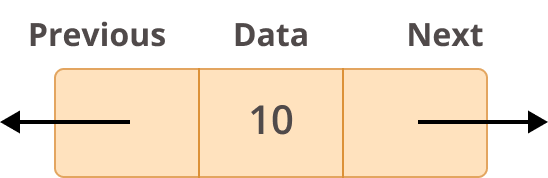
    
If you wanted to implement the above, then you could make some changes to your existing Node class in order to include a previous field:</font>

In [5]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        self.previous = None
        
    def __repr__(self):
        return self.data

This kind of implementation would allow you to traverse a list in both directions instead of only traversing using `next`. You could use `next` to go forward and `previous` to go backward.

In terms of structure, this is how a doubly linked list would look:

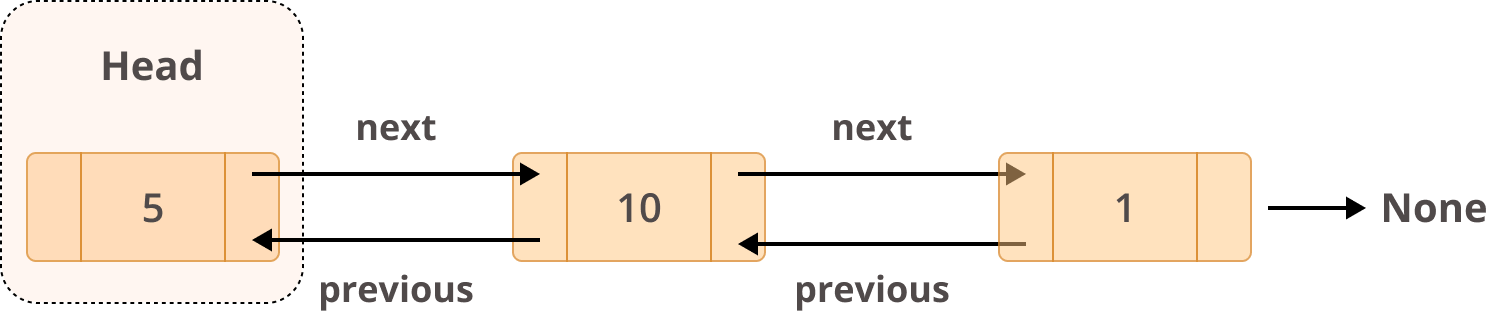

You learned earlier that `collections.deque` uses a linked list as part of its data structure. This is the kind of linked list it uses. With doubly linked lists, **`deque` is capable of inserting or deleting elements from both ends of a queue with constant O(1) performance**.

## How to Use Circular Linked Lists
<font size=4>**Circular linked lists** are a type of linked list in which **the last node points back to the head of the list instead of pointing to None**. This is what makes them circular. Circular linked lists have quite a few interesting use cases:

- Going around each player’s turn in a multiplayer game
- Managing the application life cycle of a given operating system
- Implementing a Fibonacci heap  
    
This is what a circular linked list looks like:

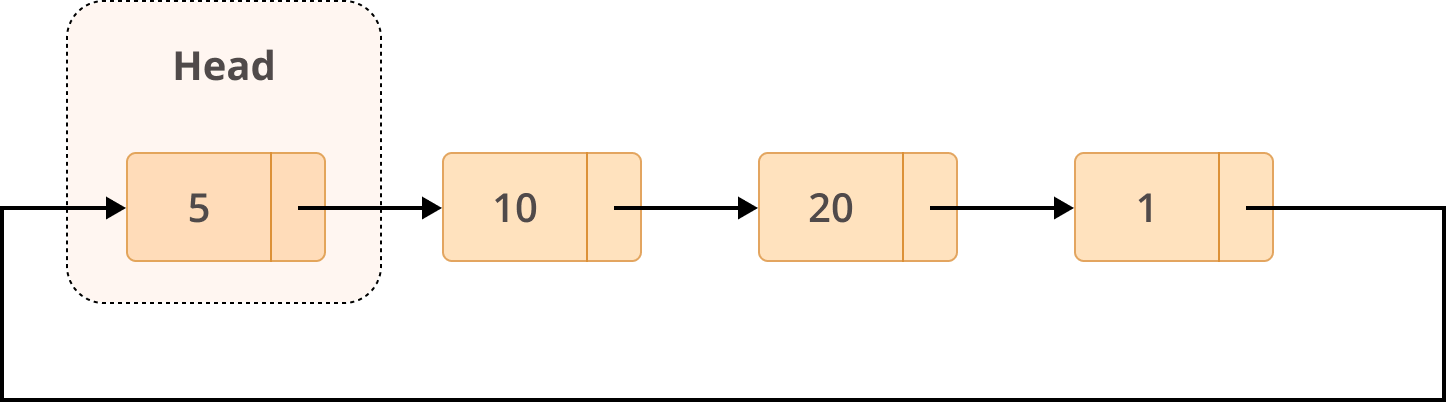
    
One of the advantages of circular linked lists is that you **can traverse the whole list starting at any node**. Since the last node points to the head of the list, you **need to make sure that you stop traversing when you reach the starting point. Otherwise, you’ll end up in an infinite loop**.

In terms of implementation, circular linked lists are very similar to singly linked list. The only difference is that you can define the starting point when you traverse the list:</font>

In [6]:
class CircularLinkedList:
    def __init__(self):
        self.head = None

    def traverse(self, starting_point=None):
        if starting_point is None:
            starting_point = self.head
        node = starting_point
        while node is not None and (node.next != starting_point):
            yield node
            node = node.next
        yield node

    def print_list(self, starting_point=None):
        nodes = []
        for node in self.traverse(starting_point):
            nodes.append(str(node))
        print(" -> ".join(nodes))

Traversing the list now receives an additional argument, `starting_point`, that is used to define the start and (because the list is circular) the end of the iteration process. Apart from that, much of the code is the same as what we had in our `LinkedList` class.

To wrap up with a final example, have a look at how this new type of list behaves when you give it some data:

In [7]:
circular_llist = CircularLinkedList()
circular_llist.print_list()


a = Node("a")
b = Node("b")
c = Node("c")
d = Node("d")
a.next = b
b.next = c
c.next = d
d.next = a
circular_llist.head = a
circular_llist.print_list()


circular_llist.print_list(b)


circular_llist.print_list(d)


None
a -> b -> c -> d
b -> c -> d -> a
d -> a -> b -> c


There you have it! You’ll notice that you no longer have the `None` while traversing the list. That’s because there is no specific end to a circular list. You can also see that choosing different starting nodes will render slightly different representations of the same list.

# Conclusion
In this article, you learned quite a few things! The most important are:

- What linked lists are and when you should use them
- How to use `collections.deque` to implement queues and stacks
- How to implement your own linked list and node classes, plus relevant methods
- What the other types of linked lists are and what they can be used for